## Relatório
### Daniel Ruhman e Marcelo Terreiro Prado

O projeto a seguir foi realizada para a disciplina de Matemática Multivariada ministrada pelo Professor Fabio Orfali no curso de Engenharia do INSPER.
Ele tem como objetivo o desenvolvimento de uma simulação computacional baseada em métodos numéricos (mais especificamente a aproximação da curva por uma linha poligonal composta por _n_ segmentos) para calcular o tempo aproximado que um objeto, sujeito apenas à força da gravidade, leva para percorrer uma trajetória dada por curvas parametrizadas e pontos iniciais e finais ou domínio.

In [92]:
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt


## Dedução	geométrica	da	parametrização	da	cicloide

Considere uma circunferência C de raio _r_ com um ponto P, fixo. Ao rolar a circunferência sobre uma reta (eixo x), o ponto P traça uma curva chamada de ciclóide. Queremos descobrir quanto a curva "caminhou" em cada eixo. A seguir, apresentamos a dedução geométrica para sua parametrização, partindo dos seguintes pressupostos:

* _θ_ = 0 no início, gira _θ_ radianos;
* o ponto P coincide com a origem do sistema de coordenadas no início do movimento;

![circulo](circunf.png)

Podemos então escrever:

![equacoes](equacoes.png)

Com os deslocamentos de x e y em mãos, precisamos descobrir os segmentos de reta para determinar as parametrizações em relação ao parâmetro _θ_. Começemos por |OT| . Como C está em contato com a reta, deduzimos que:

![ot](ot.png)

Podemos deduzir pela figura os outros 3 segmentos restantes:

![seg](seg.png)

Agora resta substituir os segmentos encontrados nas equações 1 e 2 e obtemos a parametrização final:

![final](param.png)

## Modelo Computacional

O modelo desenvolvido pelo grupo encontra-se explicado abaixo. Inicialmente, declaramos as variáveis que irão armazenar as parametrizações, além de definir alguns parâmetros e algumas burocracias de código. Também definimos o dominios das parametrizações.
##### Coloque a sua parametrização e o domínio nas variáveis abaixo 

In [93]:
def retornaParametrizacao (t):
    # Parametrização em X
    xParam = np.cos(t)
    # Parametrização em Y
    yParam = np.sin(t)
    return (xParam, yParam)
    

dominioMin = np.pi
dominioMax = (3*np.pi) / 2

In [94]:
v0 = 0
tTotal = 0
distTotal = 0
precisao = 0.01
delta = np.arange(dominioMin,dominioMax, precisao)
gravidade = 9.81

xMax, yMax = retornaParametrizacao(dominioMin)
listaX = []
listaY = []

Depois, declaramos uma função cujo objetivo é achar os segmentos de reta que usaremos para aproximar a curva. Esses segmentos são, como mostra a imagem, a hipotenusa entre dois pontos da curva. A diferença entre esses pontos é a precisão do cálculo. Quanto menor a diferença entre eles, melhor a aproximação. A função recebe os pontos para os quais calcular o segmento de reta, obtidos através da função acima. Além disso, ela retorna o angulo de inclinação das retas que irá nos ajudar a calcular o tempo.

![hipotenusa](hip.png)

In [95]:
def findHipotenusa (x0, x1, y0, y1):
    deltaX = x1 - x0
    deltaY = y1 - y0
    # Em radiano
    angulo = np.arctan(deltaY/deltaX)
    return np.sqrt((deltaX**2) + (deltaY**2)), angulo

Então, declaramos uma função que irá nos retornar o tempo de percurso de cada segmento de reta. Ela recebe como parametros o angulo de inclinação, a distancia (hipotenusa) e a velocidade inicial. E ela retorna o tempo de percurso e a velocidade final (que será utilizada como inicial para o próximo segmento na próxima iteração, e assim por diante).
Para calcular o tempo, utilizamos a equação:
![fisica](equacao.png)

Como já possuimos os parametros _ΔS_ (tamanho do segmento/hipotenusa), _v0_ (inicialmente 0, depois igual a velocidade final no segmento anterior) e _a_ (aceleração da gravidade), só precisamos isolar o _t_.

In [96]:
# Formula usada
# dist = v0*t + (a*(t**2))/2
def retornaTempo (teta, dist, v0):
    a = gravidade * np.cos(teta)
    
    delta = 4*(v0**2) + 8*a*dist
    t1 = (-2*v0 + np.sqrt(delta))/(2*a)
    #t2 = (-2*v0 - np.sqrt(delta))/(2*a)
    v = v0 + a*t1 
    return (t1,v)

Por fim, contruímos o loop que junta todas essa funções. Ele roda para cada intervalo de precisão definido, e tem o seguinte comportamento: 
* Primeiro, descobre as coordenadas dos dois pontos do segmento aproximado por reta, com base na precisão pré definida
* Depois, descobre o comprimento dessa reta (hipotenusa) e o seu angulo de inclinação, usando seu ponto inicial e final.
* Então, calcula o tempo necessário para percorrer tal segmento e o adiciona ao tempo total para percorrer a curva.
* Isso é repetido para cada intervalo de precisão definido, até percorrer a curva inteira.

Por fim, imprime os valores

Tempo total (s)
2.26049822885
Distancia total (m)
1.57999341667


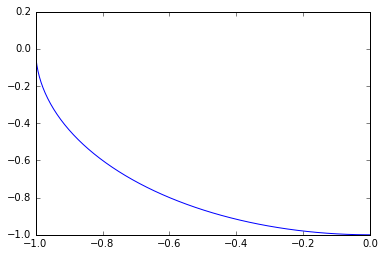

In [97]:
consegueSubir = True

for t in delta:
    x0, y0 = retornaParametrizacao(t)

    listaX.append(x0)
    listaY.append(y0)
    x1, y1 = retornaParametrizacao(t + precisao)
    
    if (y1 > yMax):
        consegueSubir = False
        print('A bolinha não consegue subir essa curva. O Y máximo é {0}'.format(yMax))
        break
    
    hip, angulo = findHipotenusa(x0,x1,y0,y1)
    distTotal += hip
    t1, v = retornaTempo(angulo, hip, v0)
    v0 = v
    tTotal += t1
    #print(t1,v)
    
if consegueSubir: 
    print("Tempo total (s)")
    print(tTotal)
    print('Distancia total (m)')
    print(distTotal)

plt.plot(listaX,listaY)
plt.show()

## Validação

Abaixo está a validação da nossa simulação computacional. Nela, utilizamos uma reta como curva parametrizável. Olhando seu domínio, fica claro que a distância percorrida faz sentido. Utilizando pitágoras, pode-se perceber que a distância vale raiz quadradada de 200, o que bate com nosso resultado.

Para o cálculo do tempo, 

Tempo total (s)
2.01927510938
Distancia total (m)
14.1421356237


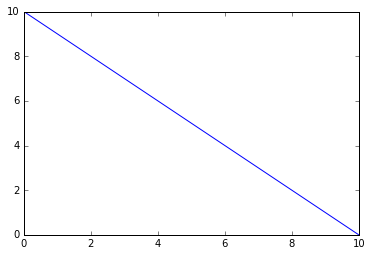

In [100]:
def retornaParametrizacao (t):
    # Parametrização em X
    xParam = t
    # Parametrização em Y
    yParam = 10 -t
    return (xParam, yParam)
    

dominioMin = 0
dominioMax = 10
v0 = 0
tTotal = 0
distTotal = 0
precisao = 0.01
delta = np.arange(dominioMin,dominioMax, precisao)
gravidade = 9.81

xMax, yMax = retornaParametrizacao(dominioMin)
listaX = []
listaY = []
consegueSubir = True

for t in delta:
    x0, y0 = retornaParametrizacao(t)

    listaX.append(x0)
    listaY.append(y0)
    x1, y1 = retornaParametrizacao(t + precisao)
    
    if (y1 > yMax):
        consegueSubir = False
        print('A bolinha não consegue subir essa curva. O Y máximo é {0}'.format(yMax))
        break
    
    hip, angulo = findHipotenusa(x0,x1,y0,y1)
    distTotal += hip
    t1, v = retornaTempo(angulo, hip, v0)
    v0 = v
    tTotal += t1
    #print(t1,v)
    
if consegueSubir: 
    print("Tempo total (s)")
    print(tTotal)
    print('Distancia total (m)')
    print(distTotal)

plt.plot(listaX,listaY)
plt.show()